<a href="https://colab.research.google.com/github/Abrar090909/CognoRise-Infotech/blob/main/cognorise_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris Flower Classification**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go



In [ ]:
# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width
y = iris.target  # Labels: Species (setosa, versicolor, virginica)

In [ ]:
# Step 2: Explore and visualize the data
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['species'])

# Replace the numerical species with their names for better visualization
df['species'] = df['species'].apply(lambda x: iris.target_names[int(x)])

fig = px.scatter_matrix(df, dimensions=iris.feature_names, color='species', symbol='species')
fig.update_layout(title='Scatter matrix of Iris dataset')
fig.show()

In [ ]:
# Step 3: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Step 5: Train a classification model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Step 6: Evaluate the model
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = iris.target_names

fig = go.Figure(data=go.Heatmap(
                   z=conf_matrix,
                   x=labels,
                   y=labels,
                   hoverongaps=False,
                   colorscale='Blues'))

fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted Label'),
    yaxis=dict(title='True Label')
)
fig.show()

In [ ]:
# Step 7: Make predictions (Example)
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example measurements
new_data_scaled = scaler.transform(new_data)
prediction = knn.predict(new_data_scaled)
print("Predicted species:", iris.target_names[prediction][0])

Predicted species: setosa


**Car Price Pridiction**

***Step 1 Data Loading and Exploration***

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

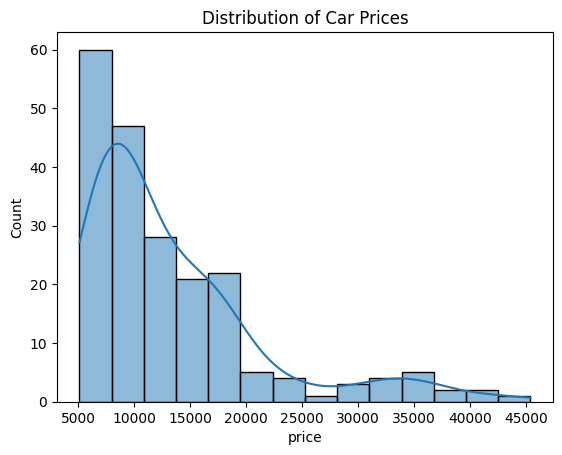

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assume the dataset is uploaded and available as 'car_prices.csv'
df = pd.read_csv('/content/CarPrice_Assignment.csv')

# Display basic information about the dataset
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable (price)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()


***Step 2 Data Preprocessing***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Display preprocessed data (for verification)
preprocessed_X_train = preprocessor.fit_transform(X_train)
preprocessed_X_test = preprocessor.transform(X_test)


***Step 3 Model Selection***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 1376.4869024390243
Mean Squared Error: 3666126.8105526576
Root Mean Squared Error: 1914.7132449932699
R^2 Score: 0.9535604245932532


***Step 4 Model Tuning***

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)


***Step 6 Final Model Evaluation***

In [ ]:
# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print('Final Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Final Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Final Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('Final R^2 Score:', r2_score(y_test, y_pred))


Final Mean Absolute Error: 1373.020073170732
Final Mean Squared Error: 3651634.0318635744
Final Root Mean Squared Error: 1910.9249152867244
Final R^2 Score: 0.9537440075743022
